In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega os dados

In [5]:
ocorrencia_tipo=pd.read_csv('Dados/ocorrencia_tipo_2010_2020.csv', sep = ';', low_memory=False)
ocorrencia_tipo

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,39115,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL
1,39155,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,39156,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI
3,39158,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...,SCF-PP
4,39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
...,...,...,...,...
5879,79802,VAZAMENTO DE OUTROS FLUIDOS,OUTROS | VAZAMENTO DE OUTROS FLUIDOS,OTHR
5880,79804,DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
5881,79824,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I
5882,79844,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP


### Verificando os tipos das colunas e se existem dados faltantes

In [6]:
ocorrencia_tipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia1         5884 non-null   int64 
 1   ocorrencia_tipo            5884 non-null   object
 2   ocorrencia_tipo_categoria  5884 non-null   object
 3   taxonomia_tipo_icao        5884 non-null   object
dtypes: int64(1), object(3)
memory usage: 184.0+ KB


### Verificando se existem dados duplicados

In [7]:
print("Duplicated values: ", ocorrencia_tipo.duplicated().sum())

Duplicated values:  0


# Carregando os dados das ocorrências que foram filtradas no notebook Ocorrencias.ipynb

In [10]:
ocorrencias=pd.read_csv('Dados/Ocorrencias_Filtradas.csv', sep = ',', low_memory=False)
ocorrencias

,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,3,1,2010
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,3,1,2010
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,3,1,2010
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,5,1,2010
...,...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020,29,12,2020
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,****,31/12/2020,31,12,2020


# Juntando os 2 dados, de ocorrências e dos tipos de ocorrências

In [11]:
merge_ocorrencias = pd.merge(ocorrencias, ocorrencia_tipo, on=['codigo_ocorrencia1'])
merge_ocorrencias

,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,3,1,2010,TRÁFEGO AÉREO,PERDA DE SEPARAÇÃO / COLISÃO EM VOO | TRÁFEGO ...,MAC
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,3,1,2010,COLISÃO COM AVE,COLISÃO COM AVE,BIRD
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,3,1,2010,COLISÃO COM AVE,COLISÃO COM AVE,BIRD
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,4,1,2010,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,5,1,2010,OUTROS,OUTROS,OTHR
...,...,...,...,...,...,...,...,...,...,...,...,...
5879,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020,29,12,2020,DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
5880,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
5881,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020,VAZAMENTO DE OUTROS FLUIDOS,OUTROS | VAZAMENTO DE OUTROS FLUIDOS,OTHR
5882,79756,INCIDENTE GRAVE,VICENTINA,MS,****,31/12/2020,31,12,2020,POUSO EM LOCAL NÃO PREVISTO,OUTROS | POUSO EM LOCAL NÃO PREVISTO,OTHR


# Selecionando os top 10 tipos de ocorrências

In [19]:
filter_ocorrencias = merge_ocorrencias['ocorrencia_tipo'].value_counts().head(10)

In [22]:
top_10_ocorrencias_tipo = merge_ocorrencias.query('ocorrencia_tipo in @filter_ocorrencias.index.tolist()')
top_10_ocorrencias_tipo

,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,3,1,2010,COLISÃO COM AVE,COLISÃO COM AVE,BIRD
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,3,1,2010,COLISÃO COM AVE,COLISÃO COM AVE,BIRD
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,5,1,2010,OUTROS,OUTROS,OTHR
5,39807,INCIDENTE,SALVADOR,BA,****,06/01/2010,6,1,2010,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
7,39707,INCIDENTE GRAVE,CANUTAMA,AM,****,09/01/2010,9,1,2010,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
...,...,...,...,...,...,...,...,...,...,...,...,...
5875,79753,INCIDENTE GRAVE,GOIATUBA,GO,****,29/12/2020,29,12,2020,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
5877,79769,INCIDENTE GRAVE,MANOEL URBANO,AC,SIMB,29/12/2020,29,12,2020,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
5878,79769,INCIDENTE GRAVE,MANOEL URBANO,AC,SIMB,29/12/2020,29,12,2020,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
5880,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP


# Panorama das classificações acidente e incidente de acordo com os top 10 tipos de ocorrências

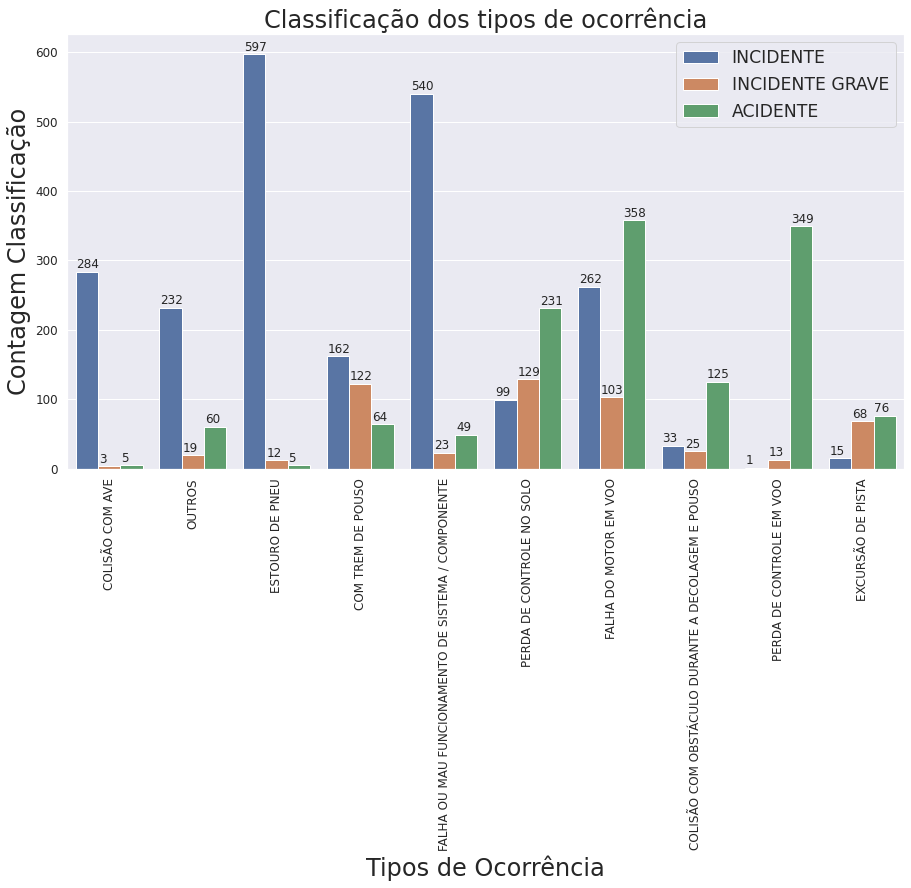

In [58]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=top_10_ocorrencias_tipo.ocorrencia_tipo ,data=top_10_ocorrencias_tipo, hue=top_10_ocorrencias_tipo.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Tipos de Ocorrência")
plt.ylabel("Contagem Classificação")
plt.title("Classificação dos tipos de ocorrência")
plt.xticks(rotation=90)

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+5))


# Panorama dos acidente e incidente de acordo com os top 10 tipos de ocorrências

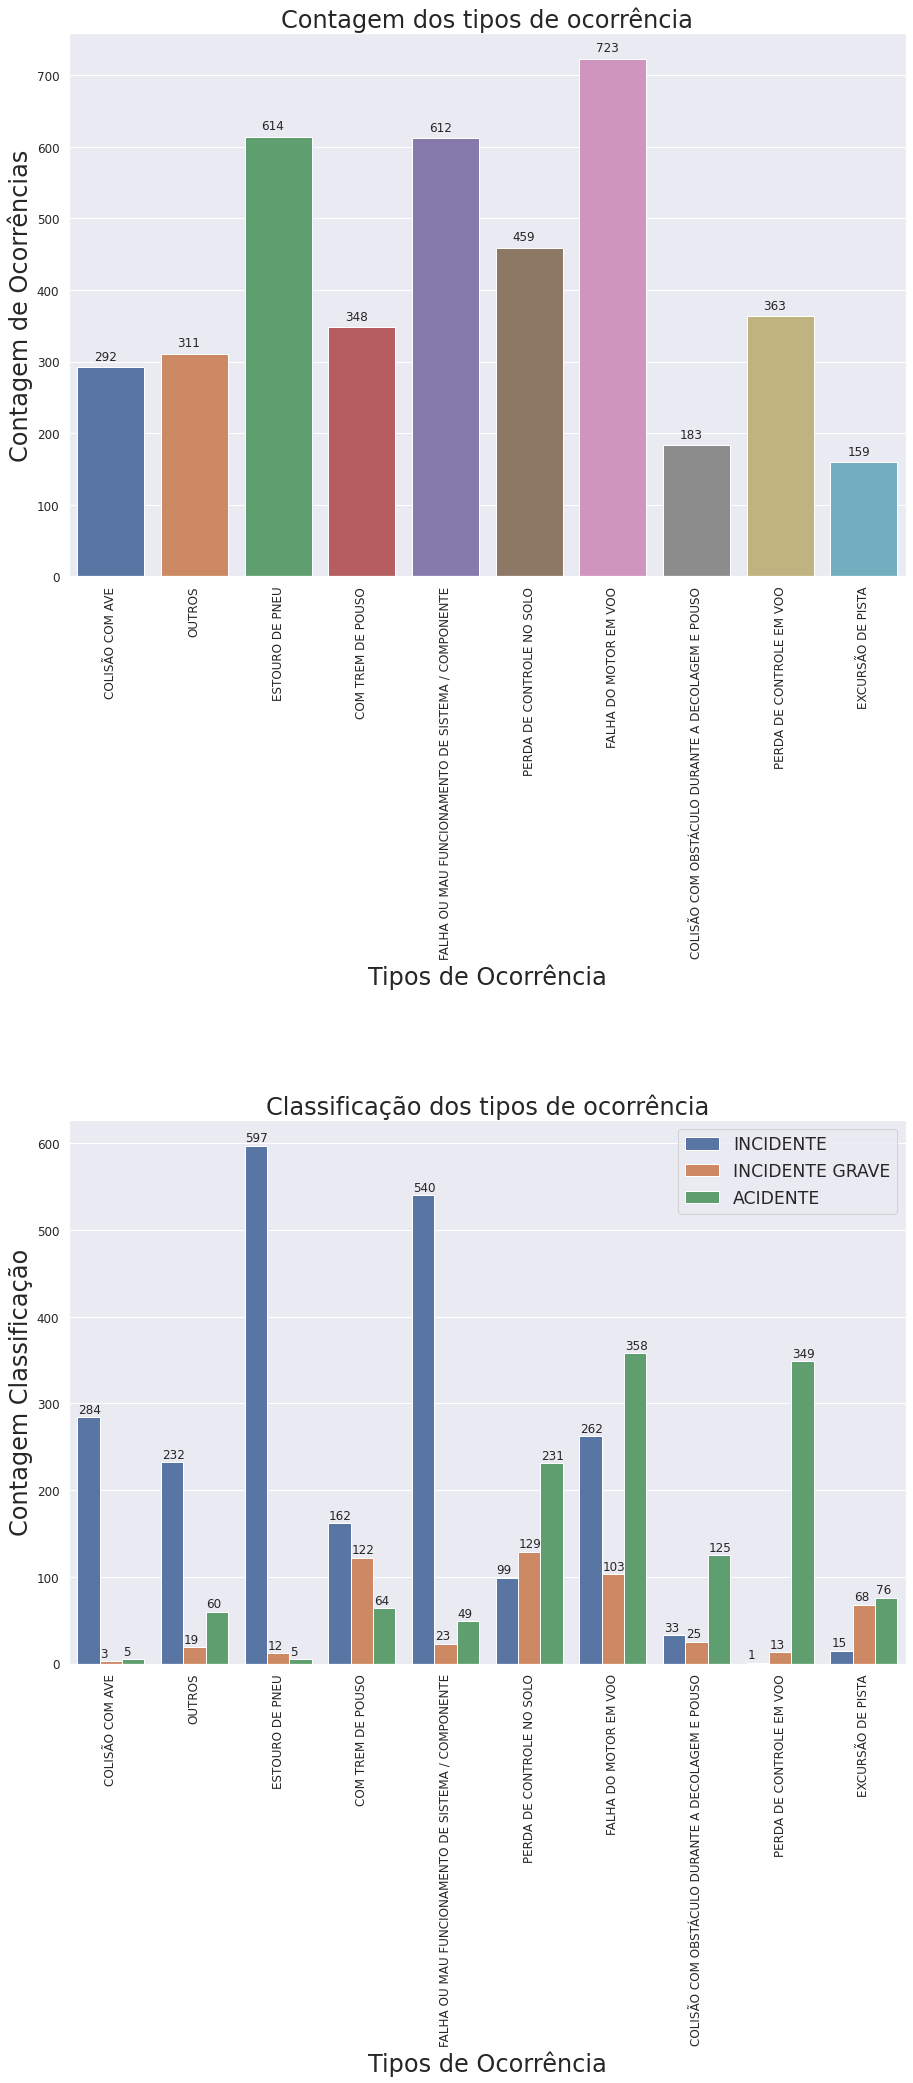

In [56]:
fig = plt.figure(figsize=(15,30))
fig.subplots_adjust(hspace=1, wspace=0.4)

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)


plot1 = plt.subplot(2, 1, 1)
ax1 = sns.countplot(x=top_10_ocorrencias_tipo.ocorrencia_tipo ,data=top_10_ocorrencias_tipo)
plt.xlabel("Tipos de Ocorrência")
plt.ylabel("Contagem de Ocorrências")
plt.title("Contagem dos tipos de ocorrência")
plt.xticks(rotation=90)

for p in ax1.patches:
        ax1.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+10))

plot2 = plt.subplot(2, 1, 2)
ax2 = sns.countplot(x=top_10_ocorrencias_tipo.ocorrencia_tipo ,data=top_10_ocorrencias_tipo, hue=top_10_ocorrencias_tipo.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Tipos de Ocorrência")
plt.ylabel("Contagem Classificação")
plt.title("Classificação dos tipos de ocorrência")
plt.xticks(rotation=90)

for p in ax2.patches:
        ax2.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+5))
